In [2259]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (12, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [2260]:
ad = pd.read_csv(r"C:\Users\taiwo\Downloads\adverts.csv")

In [2261]:
ad.shape

(402005, 12)

In [2262]:
ad.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [2263]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [2264]:
ad_sub = ad.sample(frac=0.02)

In [2265]:
ad_sub.shape

(8040, 12)

In [2266]:
ad_sub.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
374152,202009123638932,36347.0,17,Red,Nissan,Qashqai,USED,2017.0,10999,SUV,False,Petrol
5105,202003048018435,55215.0,13,Black,Audi,Q5,USED,2013.0,14850,SUV,False,Petrol
355851,202009294367019,13773.0,65,Red,Citroen,DS3 Cabrio,USED,2015.0,7000,Convertible,False,Petrol
315029,202008212757379,17100.0,64,Black,Vauxhall,Astra,USED,2014.0,8495,Estate,False,Diesel
122341,202010275505728,83108.0,61,Grey,Lexus,IS 250,USED,2011.0,6999,Saloon,False,Petrol


In [2267]:
ad_sub = ad_sub.drop(columns='public_reference')

In [2518]:
ad_sub[['mileage','price']].describe()

,mileage,price
count,8037.000000,8040.000000
mean,37595.265024,17172.949005
std,34832.935189,19105.783948
min,0.000000,250.000000
25%,10488.000000,7499.000000
50%,28715.000000,12699.000000
75%,56312.000000,20495.000000
max,388000.000000,389950.000000


<Axes: xlabel='mileage'>

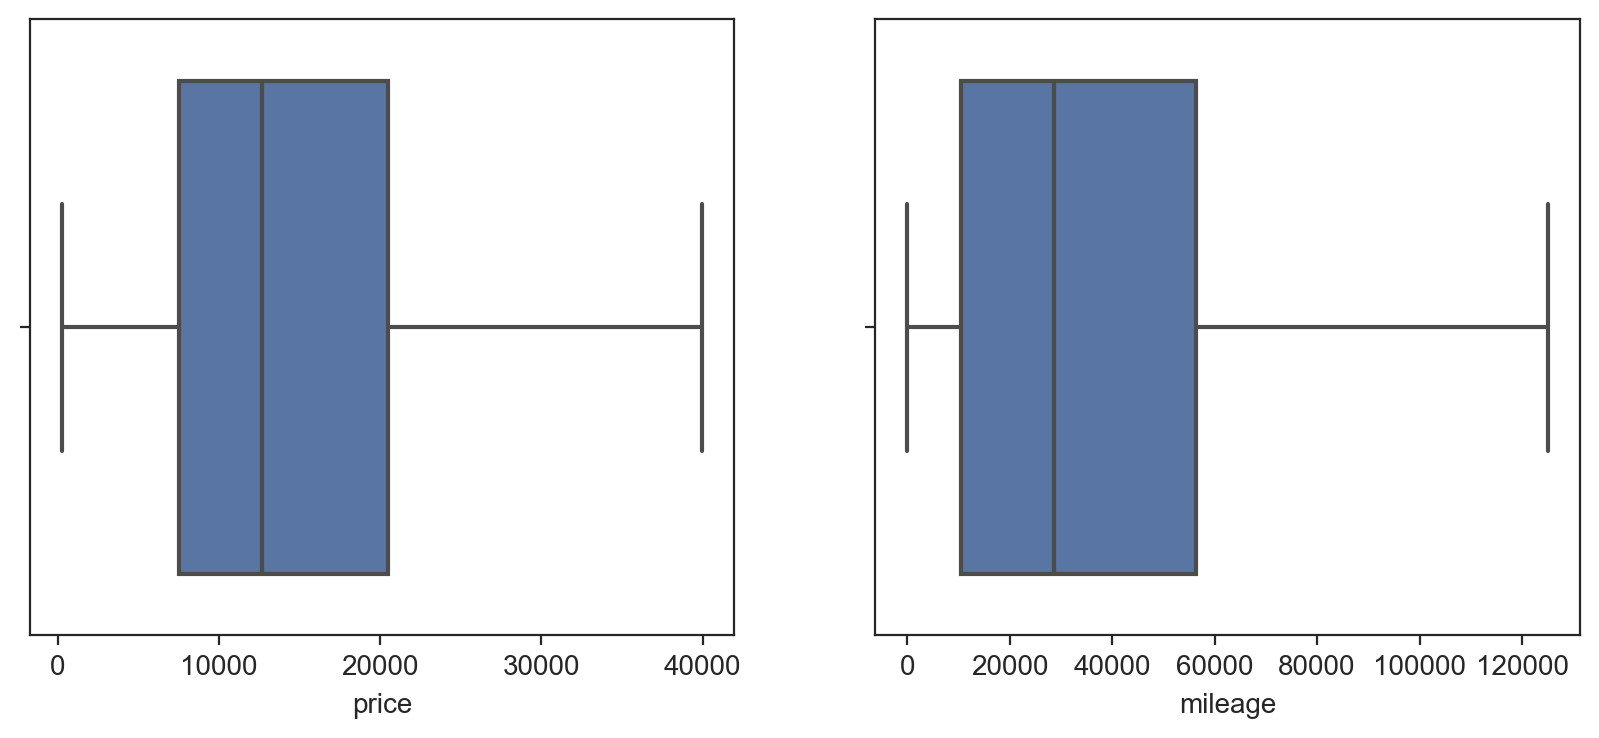

In [2269]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
sns.boxplot(data = ad_sub, x = 'price', showfliers =False, ax = axs[0])
sns.boxplot(data = ad_sub, x = 'mileage', showfliers=False, ax = axs[1])

<Axes: xlabel='standard_make'>

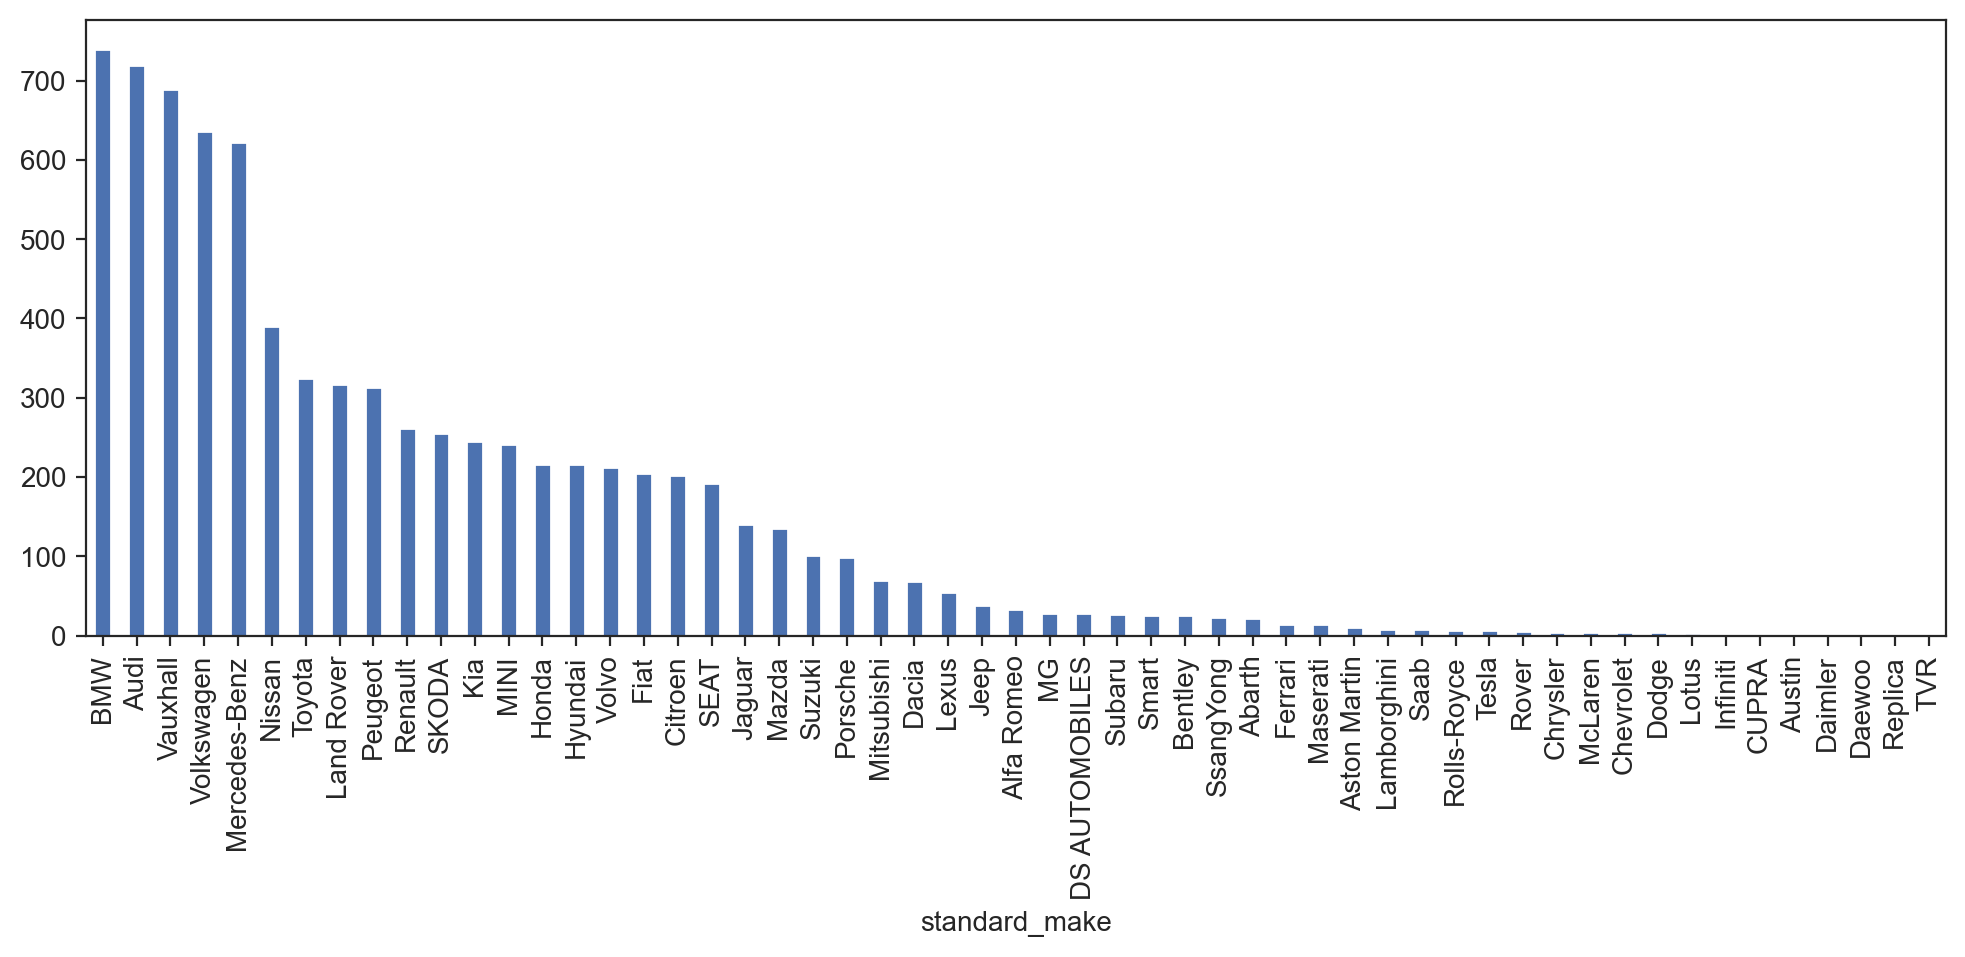

In [2270]:
ad_sub['standard_make'].value_counts().plot.bar()

<Axes: xlabel='body_type'>

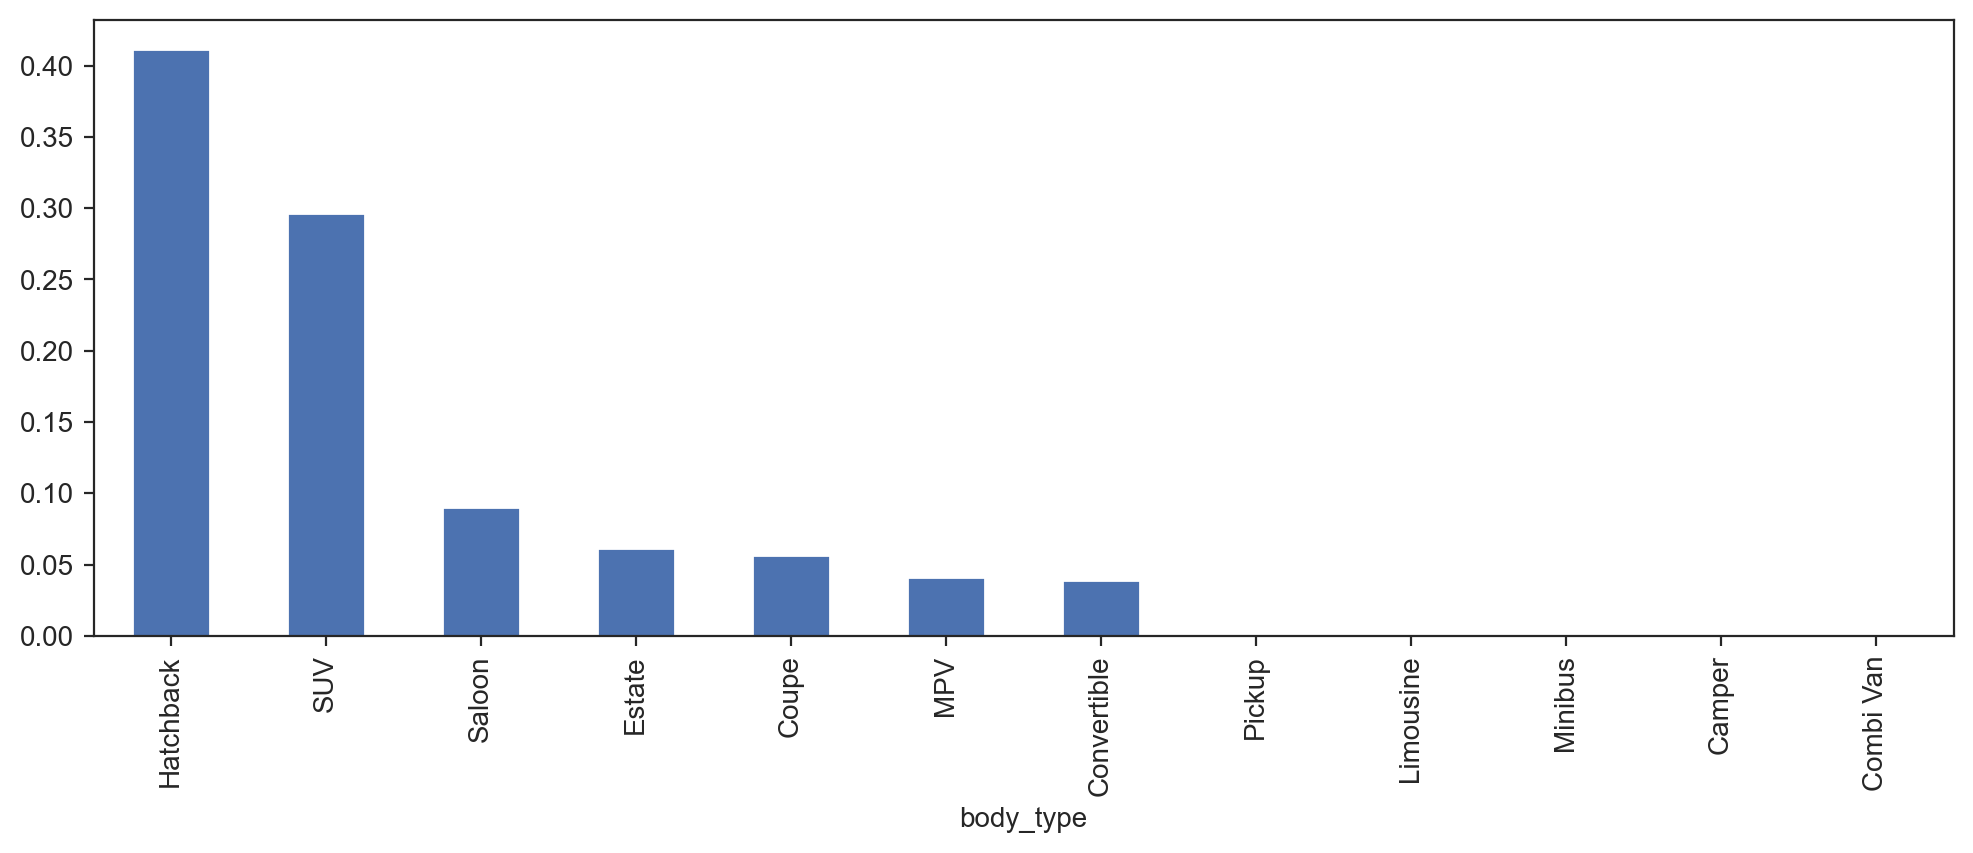

In [2523]:
ad_sub['body_type'].value_counts(normalize=True).plot.bar()

<Axes: xlabel='fuel_type'>

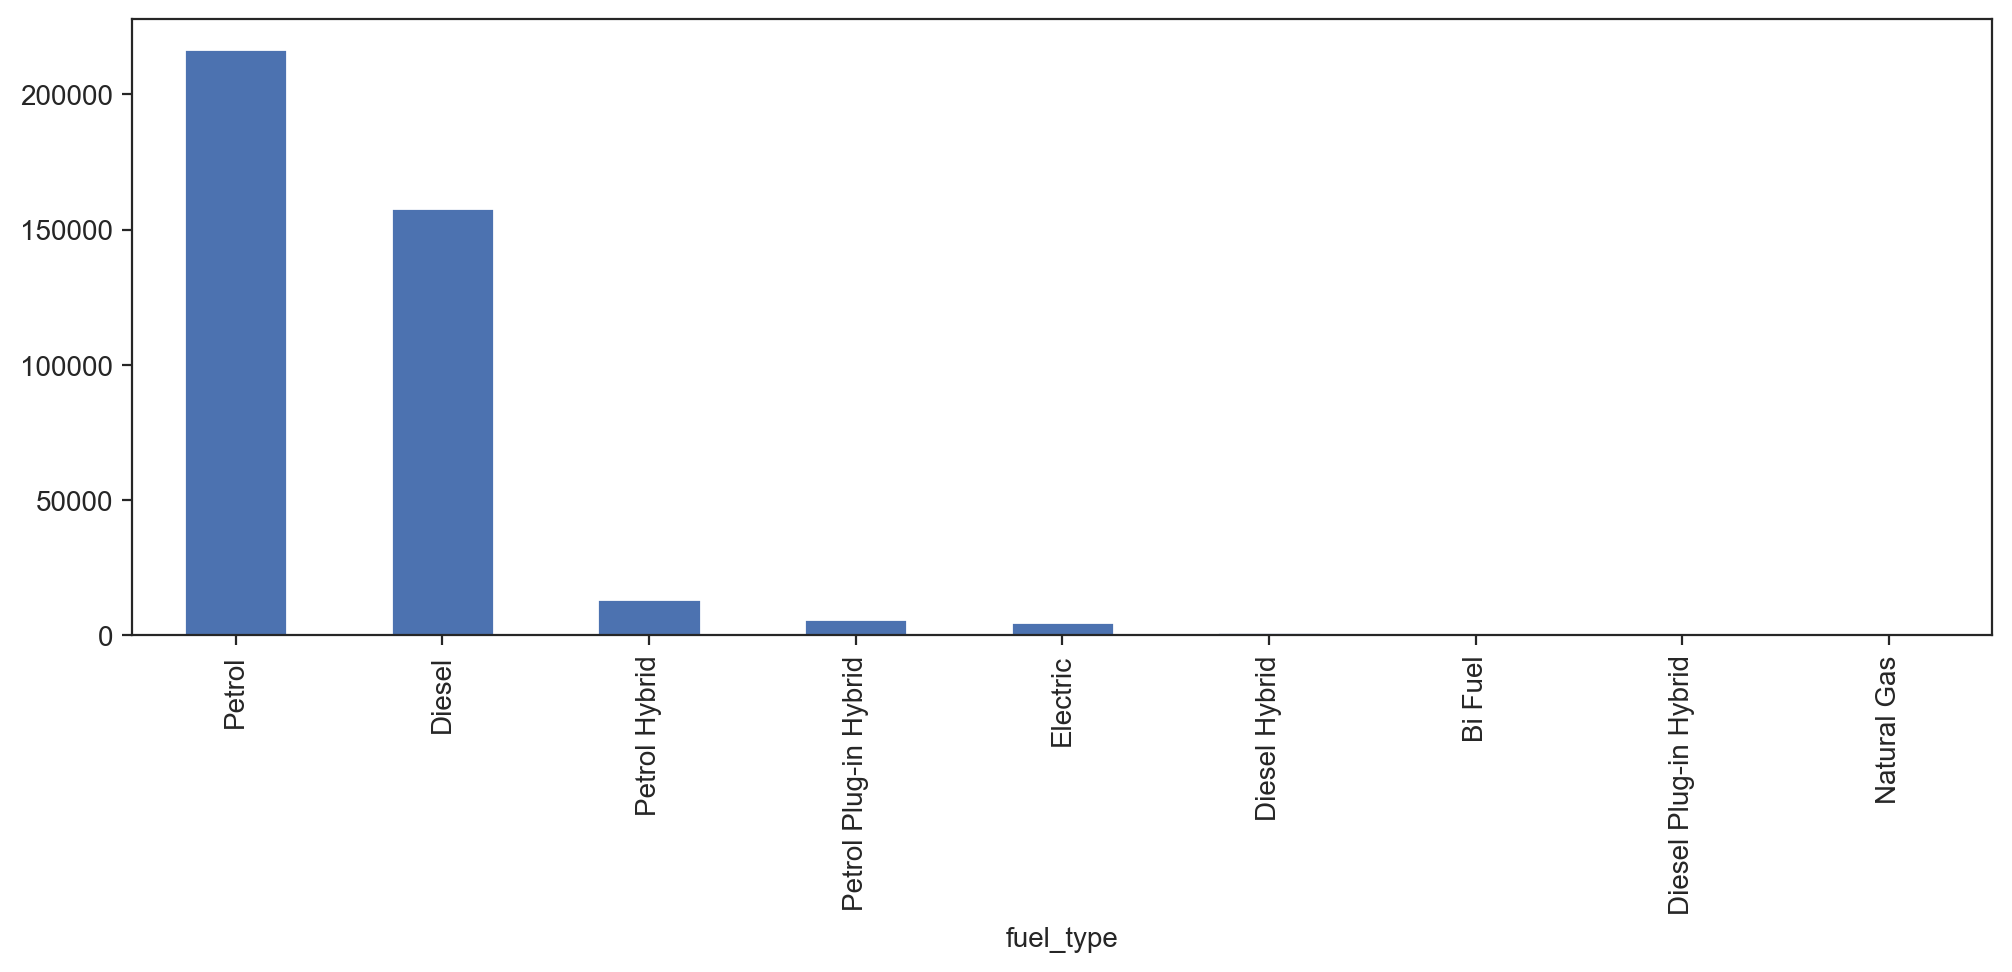

In [2272]:
ad['fuel_type'].value_counts().plot.bar()

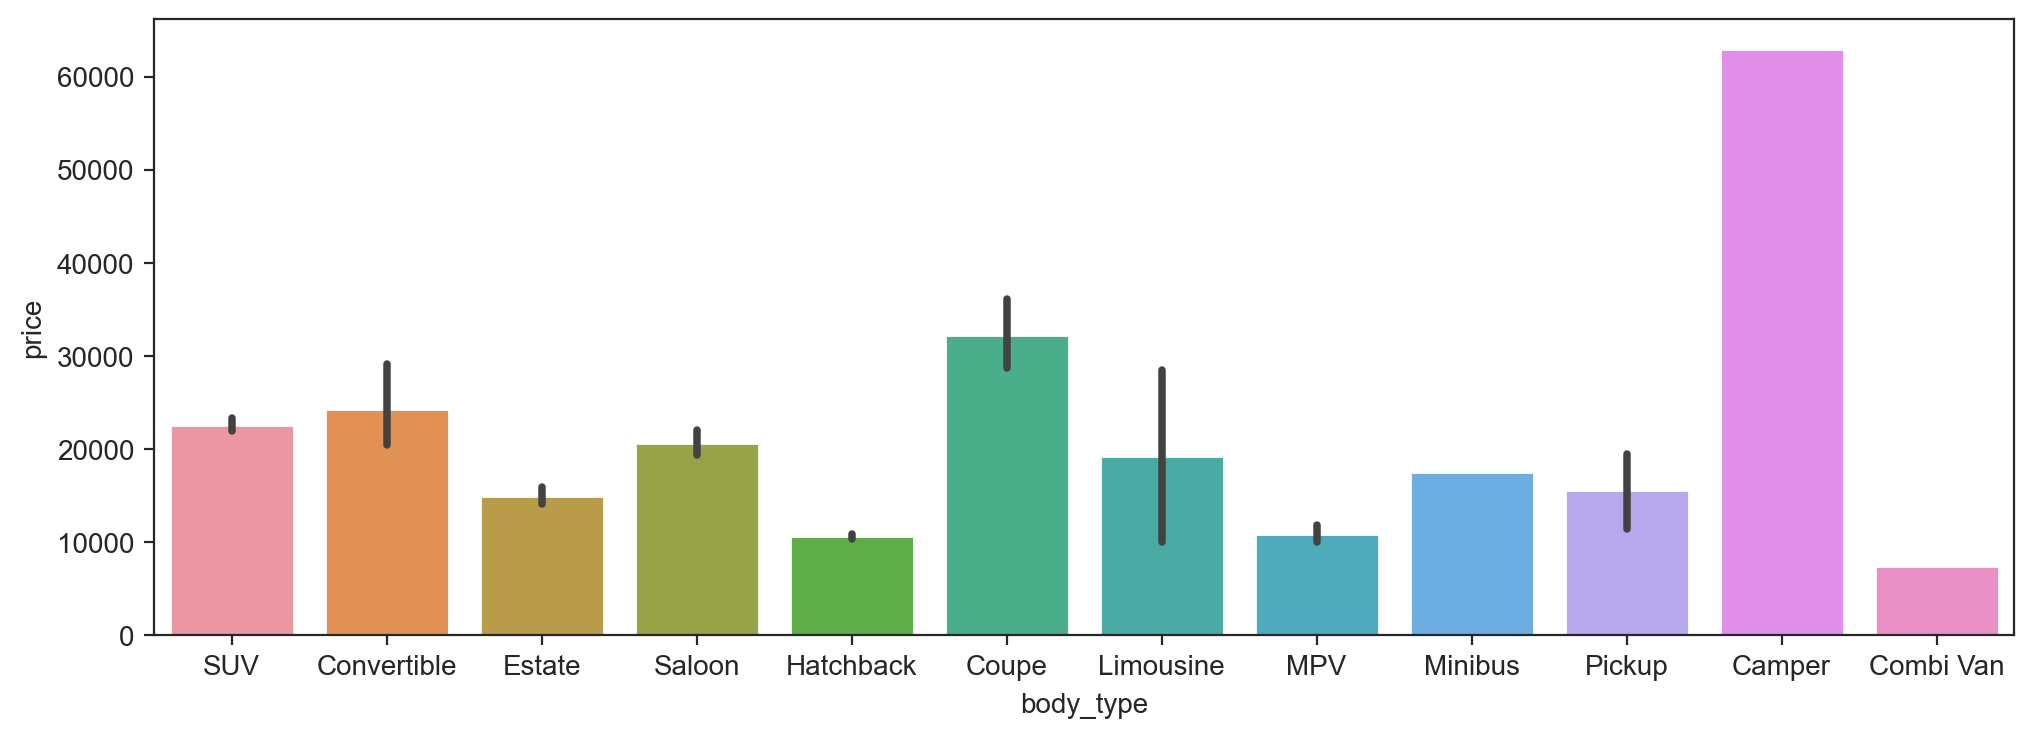

In [2273]:
plt.figure(figsize=(12,4))
sns.barplot(data =ad_sub, x = 'body_type' , y = 'price')
plt.show()

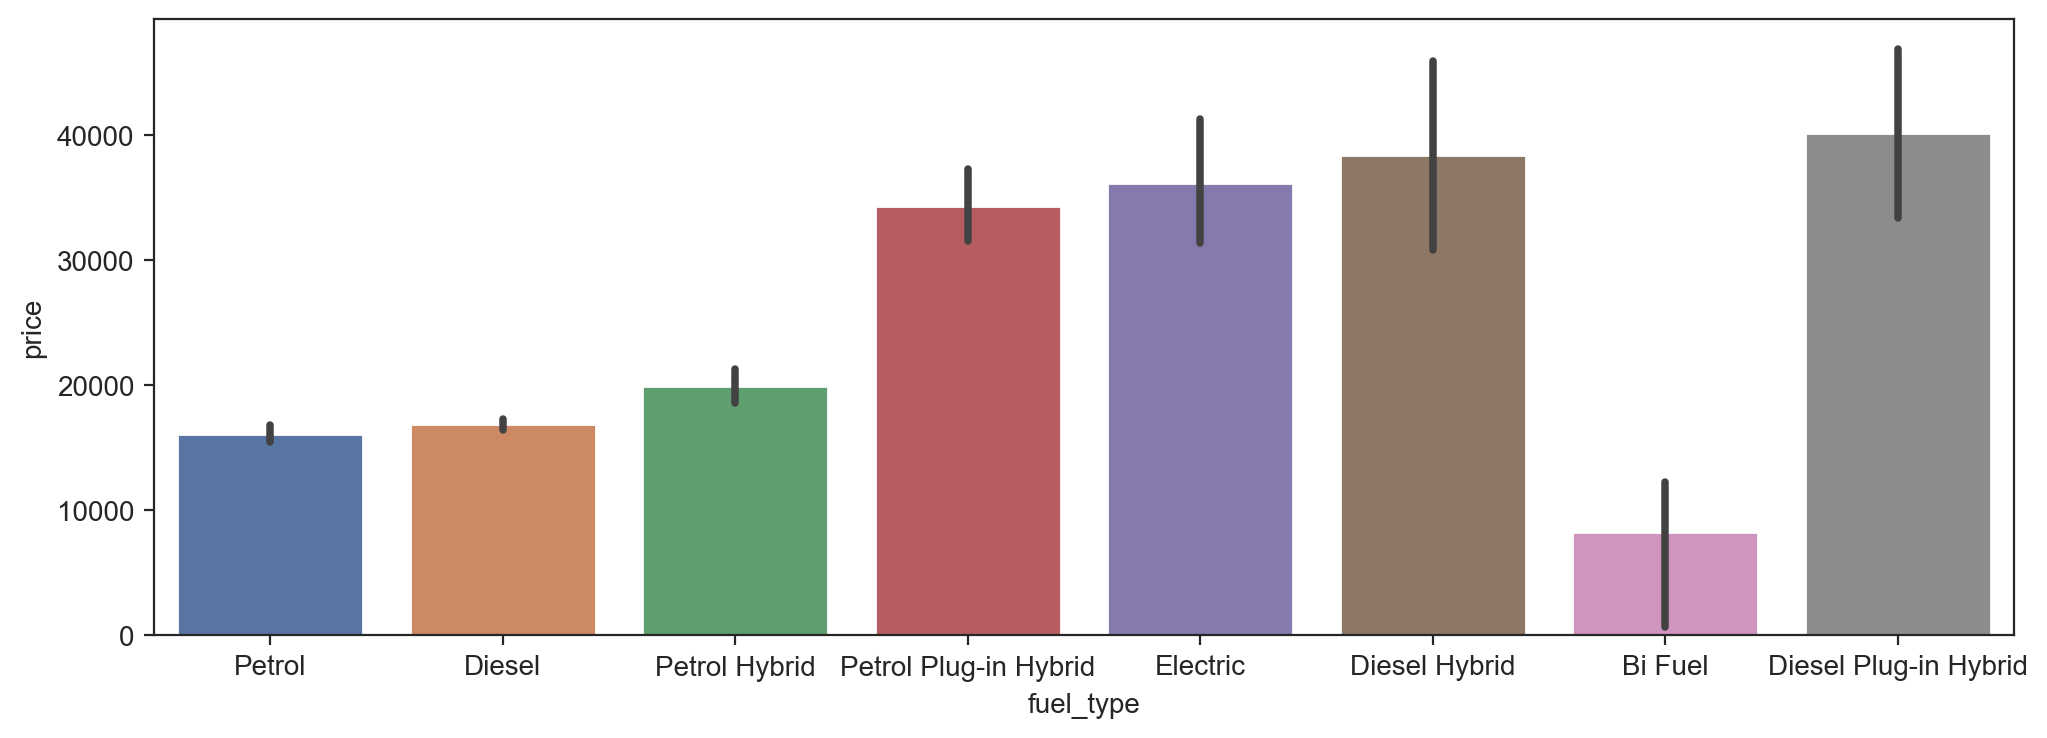

In [2521]:
plt.figure(figsize=(12,4))
sns.barplot(data =ad_sub, x = 'fuel_type' , y = 'price')
plt.show()

In [2274]:
numerical_columns = ad_sub.select_dtypes(include=['float64','int64']).columns
correlation_matrix = ad[numerical_columns].corr()
print (correlation_matrix)

                       mileage  year_of_registration     price
mileage               1.000000             -0.375541 -0.160204
year_of_registration -0.375541              1.000000  0.102341
price                -0.160204              0.102341  1.000000


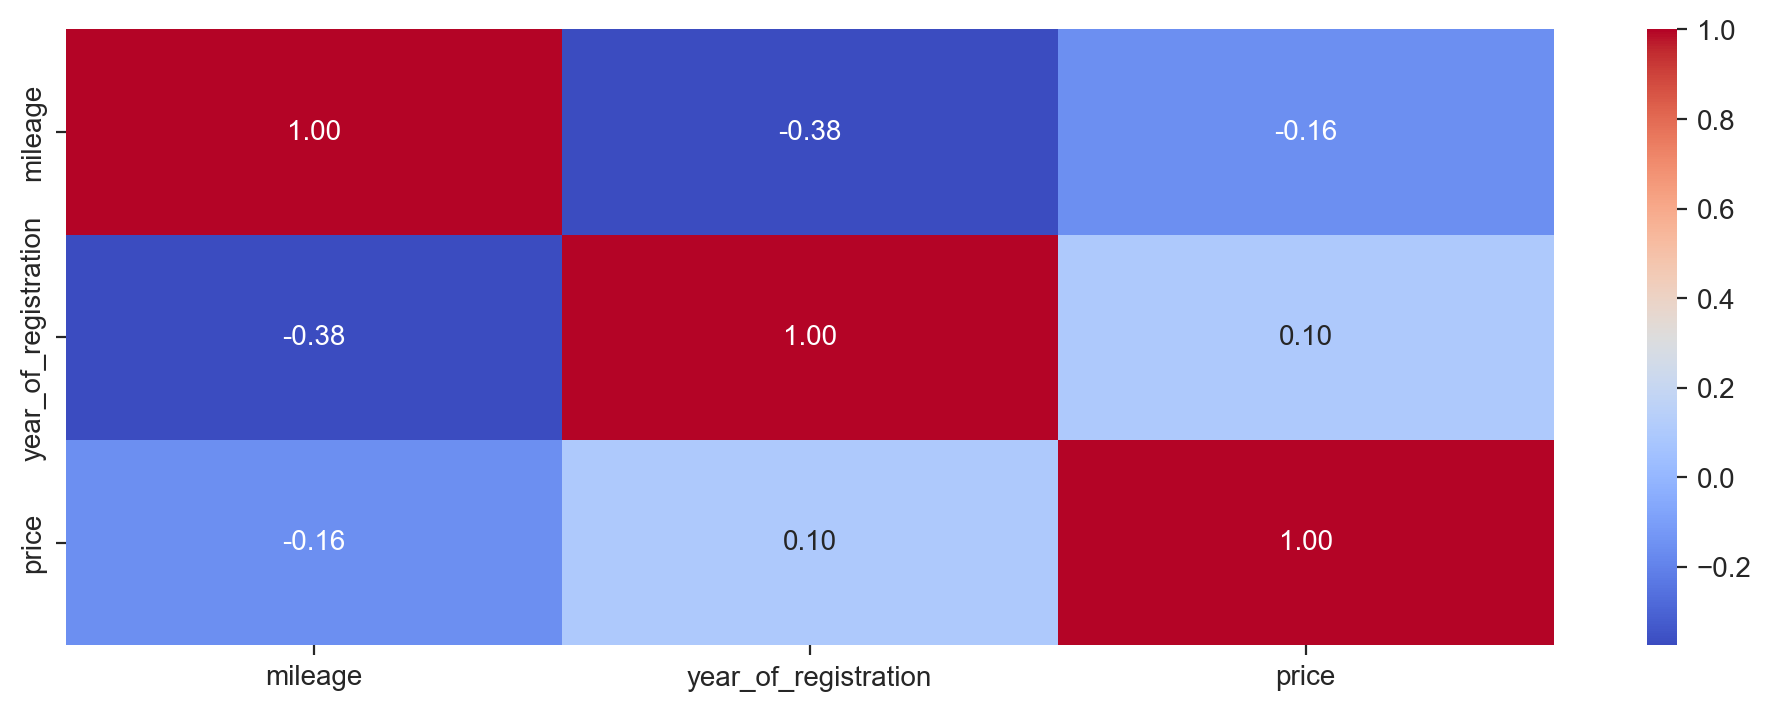

In [2275]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [2276]:
ad_sub.isna().sum()

mileage                    3
reg_code                 633
standard_colour          102
standard_make              0
standard_model             0
vehicle_condition          0
year_of_registration     666
price                      0
body_type                 16
crossover_car_and_van      0
fuel_type                 17
dtype: int64

In [2277]:
ad_sub['reg_code'].unique()

array(['17', '13', '65', '64', '61', '14', '06', '09', '18', '69', nan,
       '10', '16', '15', '19', '67', '20', '66', '08', '68', '11', '05',
       '12', '70', '63', '58', '60', '07', '59', '62', 'Y', '55', '53',
       '04', 'H', '54', 'V', '57', '03', 'F', 'P', '56', '52', 'S', 'X',
       'G', '51', 'L', 'R', 'N', 'C', 'W', '02', 'T', 'E', 'M', 'K'],
      dtype=object)

In [2278]:
ad_cl = ad_sub[pd.to_numeric(ad_sub["reg_code"], errors="coerce").notnull()]

In [2279]:
ad_cl['reg_code'].unique()

array(['17', '13', '65', '64', '61', '14', '06', '09', '18', '69', '10',
       '16', '15', '19', '67', '20', '66', '08', '68', '11', '05', '12',
       '70', '63', '58', '60', '07', '59', '62', '55', '53', '04', '54',
       '57', '03', '56', '52', '51', '02'], dtype=object)

In [2280]:
ad_cl['reg_code'] = ad_cl['reg_code'].astype(float)

In [2281]:
ad_cl['year_of_registration'].unique()

array([2017., 2013., 2015., 2014., 2011., 2006., 2009., 2018., 2020.,
       2010., 2019., 2016., 2008., 2005., 2012., 2007., 2003., 2004.,
         nan, 2002., 1010., 2001.])

In [2282]:
ad_cl.loc[ad_cl['year_of_registration'].isna()]

,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
249182,50.0,70.0,Black,Bentley,Continental,USED,NaN,189000,Coupe,False,Petrol
265802,8028.0,69.0,White,Volkswagen,Arteon,USED,NaN,22855,Saloon,False,Diesel
284572,5921.0,18.0,Black,Mercedes-Benz,C Class,USED,NaN,24995,Coupe,False,Diesel
273155,15811.0,65.0,Grey,Citroen,C1,USED,NaN,6396,Hatchback,False,Petrol
61582,121000.0,56.0,Black,Mitsubishi,L200,USED,NaN,4750,Pickup,True,Diesel
275302,15.0,70.0,Silver,SEAT,Ateca,USED,NaN,37490,SUV,False,Petrol
364541,63708.0,65.0,White,Hyundai,i20,USED,NaN,6500,Hatchback,False,Petrol
79528,72754.0,16.0,Grey,MINI,Clubman,USED,NaN,10995,Estate,False,Diesel
281911,15089.0,18.0,White,SsangYong,Tivoli,USED,NaN,10829,SUV,False,Diesel
12944,7000.0,67.0,Grey,Mercedes-Benz,C Class,USED,NaN,19795,Saloon,False,Petrol


In [2283]:
def year_calculation(reg_code):
    if reg_code < 50:
        return 2000 + reg_code
    else:
        return 2000 + (reg_code - 50)

In [2284]:
  ad_cl['year_of_registration'].fillna(ad_cl['reg_code'].apply(year_calculation), inplace=True)

In [2285]:
 ad_cl['year_of_registration'].unique()

array([2017., 2013., 2015., 2014., 2011., 2006., 2009., 2018., 2020.,
       2010., 2019., 2016., 2008., 2005., 2012., 2007., 2003., 2004.,
       2002., 1010., 2001.])

In [2355]:
 ad_cl['year_of_registration'].replace({1010:2010}, inplace=True)

In [2357]:
ad_cl['year_of_registration'].unique()

array([2017., 2013., 2015., 2014., 2011., 2006., 2009., 2018., 2020.,
       2010., 2019., 2016., 2005., 2012., 2008., 2007., 2003., 2004.,
       2002., 2001.])

In [2360]:
ad_cl['crossover_car_and_van'].replace({True: 1, False: 0}, inplace = True)
ad_cl

,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
374152,36347.0,17.0,Red,Nissan,Qashqai,USED,2017.0,10999,SUV,0,Petrol
5105,55215.0,13.0,Black,Audi,Q5,USED,2013.0,14850,SUV,0,Petrol
355851,13773.0,65.0,Red,Citroen,DS3 Cabrio,USED,2015.0,7000,Convertible,0,Petrol
315029,17100.0,64.0,Black,Vauxhall,Astra,USED,2014.0,8495,Estate,0,Diesel
122341,83108.0,61.0,Grey,Lexus,IS 250,USED,2011.0,6999,Saloon,0,Petrol
...,...,...,...,...,...,...,...,...,...,...,...
69746,14722.0,18.0,Grey,BMW,1 Series,USED,2018.0,25495,Hatchback,0,Petrol
216365,92741.0,61.0,Black,Vauxhall,Astra,USED,2011.0,2495,Hatchback,0,Diesel
228429,50413.0,17.0,Red,Toyota,RAV4,USED,2017.0,15495,SUV,0,Petrol Hybrid
322179,35224.0,13.0,Black,Citroen,C3,USED,2013.0,5995,Hatchback,0,Petrol


In [2358]:
ad_cl = ad_cl.dropna()

In [2359]:
ad_cl.isna().sum()

mileage                  0
reg_code                 0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
dtype: int64

In [2524]:
ad_ml = ad_cl.drop(columns=['reg_code','vehicle_condition'])
ad_ml.head()

,mileage,standard_colour,standard_make,standard_model,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
374152,36347.0,Red,Nissan,Qashqai,2017.0,10999,SUV,0,Petrol
5105,55215.0,Black,Audi,Q5,2013.0,14850,SUV,0,Petrol
355851,13773.0,Red,Citroen,DS3 Cabrio,2015.0,7000,Convertible,0,Petrol
315029,17100.0,Black,Vauxhall,Astra,2014.0,8495,Estate,0,Diesel
122341,83108.0,Grey,Lexus,IS 250,2011.0,6999,Saloon,0,Petrol


In [2525]:
most_common = ad_ml['standard_make'].value_counts().nlargest(20).index
most_common

Index(['BMW', 'Vauxhall', 'Audi', 'Mercedes-Benz', 'Volkswagen', 'Nissan',
       'Toyota', 'Peugeot', 'Land Rover', 'Kia', 'SKODA', 'MINI', 'Renault',
       'Hyundai', 'Honda', 'Citroen', 'SEAT', 'Volvo', 'Fiat', 'Mazda'],
      dtype='object', name='standard_make')

In [2526]:
adcm_ml = ad_ml[ad_ml['standard_make'].isin(most_common)]
adcm_ml.shape

(6499, 9)

In [2527]:
adcm_ml.isna().sum()

mileage                  0
standard_colour          0
standard_make            0
standard_model           0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
dtype: int64

Splitting the Data

In [2528]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, ParameterGrid

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [2529]:
from sklearn.preprocessing import TargetEncoder

In [2600]:
cat_feat = ['standard_make', 'body_type', 'fuel_type','standard_model','standard_colour','year_of_registration','crossover_car_and_van']
num_feat = ['mileage']

In [2601]:
X = adcm_ml[cat_feat + num_feat]
y = adcm_ml['price']

In [2602]:
X.head(5)

,standard_make,body_type,fuel_type,standard_model,standard_colour,year_of_registration,crossover_car_and_van,mileage
374152,Nissan,SUV,Petrol,Qashqai,Red,2017.0,0,36347.0
5105,Audi,SUV,Petrol,Q5,Black,2013.0,0,55215.0
355851,Citroen,Convertible,Petrol,DS3 Cabrio,Red,2015.0,0,13773.0
315029,Vauxhall,Estate,Diesel,Astra,Black,2014.0,0,17100.0
248671,Nissan,SUV,Diesel,Juke,Black,2014.0,0,53000.0


In [2603]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [2604]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5199, 8), (1300, 8), (5199,), (1300,))

Data Transformation for the models

In [2605]:
te =  TargetEncoder(
    target_type='continuous'
).set_output(transform='pandas')

In [2606]:
te.fit(X_train[cat_feat],y_train)

TargetEncoder(target_type='continuous')

In [2607]:
X_train_enc = te.transform(X_train[cat_feat])

In [2608]:
X_train_enc.head()

,standard_make,body_type,fuel_type,standard_model,standard_colour,year_of_registration,crossover_car_and_van
388595,30412.052522,19564.772517,15357.001918,24212.662840,15173.977569,10797.582818,14016.207898
273479,18810.570095,9727.382348,12301.686877,11484.772270,15173.977569,15110.193334,14016.207898
250053,18810.570095,18359.644968,12301.686877,18208.241865,16883.522526,27254.522773,14016.207898
340314,7700.351239,9727.382348,15357.001918,9664.246967,16883.522526,27254.522773,14016.207898
298685,8940.058871,19564.772517,12301.686877,11047.468943,16883.522526,15110.193334,14016.207898


In [2609]:
X_train_com = pd.concat([X_train_enc, X_train[num_feat]], axis = 1) 
X_train_com

,standard_make,body_type,fuel_type,standard_model,standard_colour,year_of_registration,crossover_car_and_van,mileage
388595,30412.052522,19564.772517,15357.001918,24212.662840,15173.977569,10797.582818,14016.207898,64000.0
273479,18810.570095,9727.382348,12301.686877,11484.772270,15173.977569,15110.193334,14016.207898,10467.0
250053,18810.570095,18359.644968,12301.686877,18208.241865,16883.522526,27254.522773,14016.207898,100.0
340314,7700.351239,9727.382348,15357.001918,9664.246967,16883.522526,27254.522773,14016.207898,4000.0
298685,8940.058871,19564.772517,12301.686877,11047.468943,16883.522526,15110.193334,14016.207898,27159.0
...,...,...,...,...,...,...,...,...
144816,6178.993708,14276.803036,12301.686877,9110.313495,13668.178389,22195.117692,14016.207898,7222.0
386332,17931.558631,9727.382348,15357.001918,11690.880078,14213.652594,10797.582818,14016.207898,42000.0
386222,10991.125979,19564.772517,16718.902199,20275.281204,16883.522526,27254.522773,14016.207898,11.0
1605,12400.777469,19564.772517,15357.001918,24020.790990,14589.477451,17498.861633,14016.207898,11500.0


In [2610]:
te.fit(X_test[cat_feat],y_test)
X_test_enc = te.transform(X_test[cat_feat])
X_test_enc.head(5)

,standard_make,body_type,fuel_type,standard_model,standard_colour,year_of_registration,crossover_car_and_van
163162,8311.403903,9872.836049,12378.582611,5900.410827,15915.604605,4382.030816,13898.560243
361687,11365.513364,19008.147247,12378.582611,12761.224557,11966.210422,5622.165903,13898.560243
318929,11115.480218,19008.147247,14888.399667,8396.613482,15323.901768,14982.200792,13898.560243
285092,8109.860158,9872.836049,14888.399667,7502.905734,15915.604605,11711.901874,13898.560243
349870,12074.578852,19008.147247,14888.399667,14676.344778,12090.066306,10847.391508,13898.560243


In [2611]:
X_test_com =  pd.concat([X_test_enc, X_test[num_feat]], axis = 1) 
X_test_com.head()

,standard_make,body_type,fuel_type,standard_model,standard_colour,year_of_registration,crossover_car_and_van,mileage
163162,8311.403903,9872.836049,12378.582611,5900.410827,15915.604605,4382.030816,13898.560243,97000.0
361687,11365.513364,19008.147247,12378.582611,12761.224557,11966.210422,5622.165903,13898.560243,63100.0
318929,11115.480218,19008.147247,14888.399667,8396.613482,15323.901768,14982.200792,13898.560243,51352.0
285092,8109.860158,9872.836049,14888.399667,7502.905734,15915.604605,11711.901874,13898.560243,39855.0
349870,12074.578852,19008.147247,14888.399667,14676.344778,12090.066306,10847.391508,13898.560243,39825.0


In [2612]:
scaler = MinMaxScaler().set_output(transform='pandas')
X_train_scaled = scaler.fit_transform(X_train_com)
X_train_scaled

,standard_make,body_type,fuel_type,standard_model,standard_colour,year_of_registration,crossover_car_and_van,mileage
388595,1.000000,0.184661,0.395119,0.202785,0.855055,0.351484,0.0,0.164948
273479,0.521254,0.000000,0.312783,0.093423,0.855055,0.521430,0.0,0.026977
250053,0.521254,0.162039,0.312783,0.151193,0.993980,1.000000,0.0,0.000258
340314,0.062780,0.000000,0.395119,0.077780,0.993980,1.000000,0.0,0.010309
298685,0.113938,0.184661,0.312783,0.089665,0.993980,0.521430,0.0,0.069997
...,...,...,...,...,...,...,...,...
144816,0.000000,0.085399,0.312783,0.073020,0.732687,0.800625,0.0,0.018613
386332,0.484981,0.000000,0.395119,0.095194,0.777015,0.351484,0.0,0.108247
386222,0.198577,0.184661,0.431820,0.168953,0.993980,1.000000,0.0,0.000028
1605,0.256748,0.184661,0.395119,0.201136,0.807556,0.615560,0.0,0.029639


In [2613]:
scaler = MinMaxScaler().set_output(transform='pandas')
X_test_scaled = scaler.fit_transform(X_test_com)
X_test_scaled

,standard_make,body_type,fuel_type,standard_model,standard_colour,year_of_registration,crossover_car_and_van,mileage
163162,0.141595,0.206532,0.000000,0.046736,0.819220,0.113486,0.0,0.444750
361687,0.292314,1.000000,0.000000,0.110796,0.594859,0.157753,0.0,0.289317
318929,0.279975,1.000000,0.067684,0.070043,0.785606,0.491869,0.0,0.235452
285092,0.131649,0.206532,0.067684,0.061698,0.819220,0.375132,0.0,0.182737
349870,0.327307,1.000000,0.067684,0.128677,0.601895,0.344273,0.0,0.182600
...,...,...,...,...,...,...,...,...
202459,0.327307,0.206532,0.067684,0.071445,0.594859,0.597297,0.0,0.179413
28526,0.292314,0.206532,0.000000,0.091500,0.686342,0.143499,0.0,0.545621
159623,0.760799,0.456185,0.067684,0.015730,0.601895,0.157753,0.0,0.687758
169402,0.177178,0.322354,0.067684,0.014043,0.594859,0.115042,0.0,0.505589


Model Building

In [2614]:
knnr = KNeighborsRegressor()
knnr.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [2615]:
y_pred = knnr.predict(X_test_scaled)

In [2616]:
y_test.head(5).to_numpy()

array([ 1195,  5995, 13285,  5995, 10273], dtype=int64)

In [2617]:
y_pred[:5]

array([ 2871.8,  5353. , 12156.8,  8727.8,  8644.8])

In [2618]:
knnr.score(X_train_scaled, y_train), knnr.score(X_test_scaled, y_test)

(0.8746899054940985, 0.5879009561443905)

In [2619]:
from sklearn.metrics import mean_absolute_error

In [2620]:
mean_absolute_error(y_train, knnr.predict(X_train_scaled))

2178.2024235429885

In [2621]:
mean_absolute_error(y_test, knnr.predict(X_test_scaled))

4242.544153846155

In [2622]:
param_grid = {
    'n_neighbors': list(range(1, 21))
}

In [2623]:
from sklearn.model_selection import ParameterGrid

In [2624]:
list(ParameterGrid(param_grid))

[{'n_neighbors': 1},
 {'n_neighbors': 2},
 {'n_neighbors': 3},
 {'n_neighbors': 4},
 {'n_neighbors': 5},
 {'n_neighbors': 6},
 {'n_neighbors': 7},
 {'n_neighbors': 8},
 {'n_neighbors': 9},
 {'n_neighbors': 10},
 {'n_neighbors': 11},
 {'n_neighbors': 12},
 {'n_neighbors': 13},
 {'n_neighbors': 14},
 {'n_neighbors': 15},
 {'n_neighbors': 16},
 {'n_neighbors': 17},
 {'n_neighbors': 18},
 {'n_neighbors': 19},
 {'n_neighbors': 20}]

In [2625]:
from sklearn.model_selection import GridSearchCV

In [2671]:
clf_knnr = GridSearchCV(knnr, param_grid, cv=5, return_train_score=True)
gs_results_knnr = clf_knnr.fit(X_train_scaled, y_train)
gs_df_knnr = pd.DataFrame(gs_results_knnr.cv_results_)

In [2672]:
gs_df_knnr.keys()

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

In [2673]:
gs_df_knnr[[
    'param_n_neighbors', 'mean_train_score', 'std_train_score',
    'mean_test_score', 'std_test_score', 'rank_test_score'
]].sort_values('rank_test_score').head()

,param_n_neighbors,mean_train_score,std_train_score,mean_test_score,std_test_score,rank_test_score
4,5,0.868688,0.005323,0.797149,0.007236,1
3,4,0.883264,0.004660,0.797143,0.008791,2
5,6,0.858194,0.003816,0.795026,0.010746,3
6,7,0.848617,0.004199,0.789880,0.013454,4
2,3,0.901540,0.005369,0.789081,0.008847,5


In [2674]:
gs_results_knnr.best_params_

{'n_neighbors': 5}

In [2679]:
gs_results_knnr.best_estimator_

KNeighborsRegressor()

In [2680]:
best_model_knnr = gs_results_knnr.best_estimator_
y_pred_best = best_model_knnr.predict(X_test_scaled)
y_pred_best[:5]

array([ 2871.8,  5353. , 12156.8,  8727.8,  8644.8])

In [2681]:
mae_knnr = mean_absolute_error(y_test, y_pred_best)
mae_knnr

4242.544153846155

Decision Tree Regressor Model

In [2633]:
from sklearn.tree import DecisionTreeRegressor

In [2634]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_scaled, y_train)

DecisionTreeRegressor()

In [2635]:
y_pred_dtr = dtr.predict(X_test_scaled)

In [2636]:
y_test.head(5).to_numpy()

array([ 1195,  5995, 13285,  5995, 10273], dtype=int64)

In [2637]:
y_pred_dtr[:5]

array([2495., 4350., 5995., 8200., 9975.])

In [2638]:
dtr.score(X_train_scaled, y_train), dtr.score(X_test_scaled, y_test)

(0.9999988776312859, 0.53250477577873)

In [2639]:
mean_absolute_error(y_train, dtr.predict(X_train_scaled))

0.30852086939796114

In [2640]:
mean_absolute_error(y_test, dtr.predict(X_test_scaled))

4114.765384615384

In [2641]:
param_grid_dtr = {
    'max_depth': [3, 5, 7, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [2642]:
list(ParameterGrid(param_grid_dtr))

[{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2},
 {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5},
 {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10},
 {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2},
 {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5},
 {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10},
 {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2},
 {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 5},
 {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10},
 {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2},
 {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5},
 {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10},
 {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2},
 {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5},
 {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10},
 {'ma

In [2643]:
clf_dtr = GridSearchCV(dtr, param_grid_dtr, cv=5, return_train_score=True)
gs_results_dtr = clf_dtr.fit(X_train_scaled, y_train)
gs_df_dtr = pd.DataFrame(gs_results_dtr.cv_results_)

In [2644]:
gs_df_dtr.keys()

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [2645]:
gs_df_dtr[[
    'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split','mean_train_score', 'std_train_score',
    'mean_test_score', 'std_test_score', 'rank_test_score'
]].sort_values('rank_test_score').head()

,param_max_depth,param_min_samples_leaf,param_min_samples_split,mean_train_score,std_train_score,mean_test_score,std_test_score,rank_test_score
31,10,2,5,0.948746,0.001464,0.852300,0.010903,1
30,10,2,2,0.950669,0.001548,0.851834,0.010165,2
32,10,2,10,0.937536,0.002672,0.847426,0.012036,3
34,10,4,5,0.933131,0.003433,0.846530,0.020650,4
33,10,4,2,0.933131,0.003433,0.846450,0.020624,5


In [2646]:
gs_results_dtr.best_params_

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}

In [2647]:
gs_results_dtr.best_estimator_

DecisionTreeRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5)

In [2648]:
best_model_dtr = gs_results_dtr.best_estimator_
y_pred_best_dtr = best_model_dtr.predict(X_test_scaled)
y_pred_best_dtr[:5]

array([ 3191.   ,  4275.875,  9327.4  ,  6230.   , 13854.75 ])

In [2649]:
y_test.head(5).to_numpy()

array([ 1195,  5995, 13285,  5995, 10273], dtype=int64)

In [2650]:
mae_dtr = mean_absolute_error(y_test, y_pred_best_dtr)
mae_dtr

3439.512332499686

Linear Regression Model

In [2651]:
from sklearn.linear_model import LinearRegression

In [2652]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [2653]:
y_pred_lr = lr.predict(X_test_scaled)
y_pred_lr[:5]

array([-8125.46543257,  2126.96533658,  4314.4652543 ,  2989.25451678,
        9304.83621254])

In [2682]:
y_test.head(5).to_numpy()

array([ 1195,  5995, 13285,  5995, 10273], dtype=int64)

In [2655]:
lr.score(X_train_scaled, y_train), lr.score(X_test_scaled, y_test)

(0.7915782796870188, 0.6745558733275845)

In [2656]:
mean_absolute_error(y_train, lr.predict(X_train_scaled))

3111.840808925898

In [2657]:
mean_absolute_error(y_test, lr.predict(X_test_scaled))

4397.153976808233

In [2658]:
param_grid_lr = {
    'fit_intercept': [True, False]
}

In [2659]:
list (ParameterGrid(param_grid_lr))

[{'fit_intercept': True}, {'fit_intercept': False}]

In [2660]:
clf_lr = GridSearchCV(lr, param_grid_lr, cv=5, return_train_score=True)
gs_results_lr = clf_lr.fit(X_train_scaled, y_train)
gs_df_lr = pd.DataFrame(gs_results_lr.cv_results_)

In [2661]:
gs_df_lr.keys()

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_fit_intercept', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [2662]:
gs_df_lr[[
    'param_fit_intercept', 'params','mean_train_score', 'std_train_score',
    'mean_test_score', 'std_test_score', 'rank_test_score'
]].sort_values('rank_test_score').head()

,param_fit_intercept,params,mean_train_score,std_train_score,mean_test_score,std_test_score,rank_test_score
0,True,{'fit_intercept': True},0.791846,0.004163,0.790464,0.018132,1
1,False,{'fit_intercept': False},0.787166,0.004121,0.785736,0.017985,2


In [2684]:
gs_results_lr.best_params_

{'fit_intercept': True}

In [2685]:
gs_results_lr.best_estimator_

LinearRegression()

In [2686]:
best_model_lr = gs_results_lr.best_estimator_
y_pred_best_lr = best_model_lr.predict(X_test_scaled)
y_pred_best_lr[:5]

array([-8125.46543257,  2126.96533658,  4314.4652543 ,  2989.25451678,
        9304.83621254])

In [2687]:
y_test.head(5).to_numpy()

array([ 1195,  5995, 13285,  5995, 10273], dtype=int64)

In [2667]:
mae_lr = mean_absolute_error(y_test, y_pred_best_lr)
mae_lr

4397.153976808233

Comparing the 3 models' best estimators against each other to determine the best

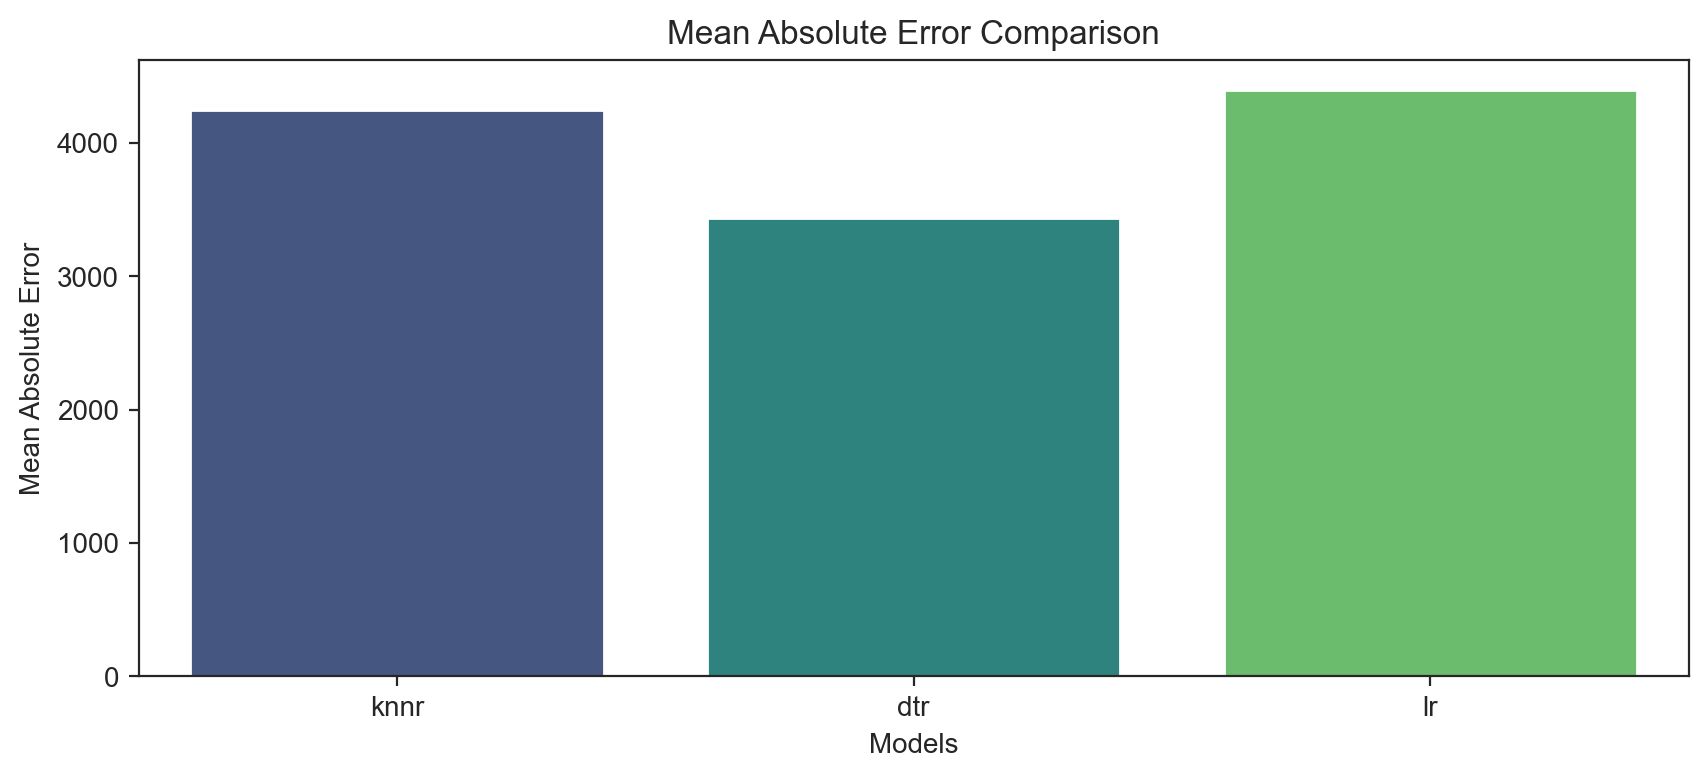

In [2688]:
models = ['knnr', 'dtr', 'lr']
mae_values = [mae_knnr, mae_dtr, mae_lr] 
plt.figure(figsize=(10, 4))
sns.barplot(x=models, y=mae_values, palette="viridis")
plt.title('Mean Absolute Error Comparison')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error')
plt.show()